In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [2]:
import pickle
(x_train, y_train), (x_validate, y_validate) = \
    pickle.load(open("dataset_encoded.p", "rb"))
print(x_train.shape)
print(y_train.shape)
print(x_validate.shape)
print(y_validate.shape)
import tensorflow as tf
split_index = int(0.8 * len(x_train))
dataset_train = tf.data.Dataset.from_tensor_slices(
    (x_train[:split_index], y_train[:split_index])
).cache()
dataset_validate = tf.data.Dataset.from_tensor_slices(
    (x_train[split_index:], y_train[split_index:])
).cache()

(1752, 64, 80)
(1752, 80)
(418, 64, 80)
(418, 80)


In [3]:
#plt.hist(x_train[:,:,0])
#plt.hist(y_train)

In [4]:
from tensorflow.keras import models, layers, regularizers

In [5]:
model = models.Sequential()

model.add(layers.Flatten(input_shape=(64,80)))
model.add(layers.Dense(320, activation="relu"))
model.add(layers.Dense(80, activation="softmax"))
model.summary()

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 5120)              0         
_________________________________________________________________
dense (Dense)                (None, 320)               1638720   
_________________________________________________________________
dense_1 (Dense)              (None, 80)                25680     
Total params: 1,664,400
Trainable params: 1,664,400
Non-trainable params: 0
_________________________________________________________________


In [6]:
print(x_validate.shape)
print(y_validate.shape)

(418, 64, 80)
(418, 80)


In [7]:
loss, accuracy = model.evaluate(x_validate, y_validate, batch_size=512)
loss, accuracy

1/1 [==============================] - 0s 988us/step - loss: 4.3867 - accuracy: 0.0024


(4.386703014373779, 0.0023923444095999002)

In [8]:
history = model.fit(
    x_train, y_train, batch_size=250,
    epochs=10,
    validation_data=(x_validate, y_validate)
)

Epoch 1/10
8/8 [==============================] - 0s 12ms/step - loss: 3.0068 - accuracy: 0.6433 - val_loss: 1.8432 - val_accuracy: 0.7010
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 1.4003 - accuracy: 0.7483 - val_loss: 1.8955 - val_accuracy: 0.7010
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 1.1676 - accuracy: 0.7483 - val_loss: 1.7047 - val_accuracy: 0.7010
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 0.9964 - accuracy: 0.7660 - val_loss: 1.7357 - val_accuracy: 0.6938
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 0.9615 - accuracy: 0.7534 - val_loss: 1.6719 - val_accuracy: 0.6986
Epoch 6/10
8/8 [==============================] - 0s 11ms/step - loss: 0.8526 - accuracy: 0.7711 - val_loss: 1.6723 - val_accuracy: 0.7010
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 0.7937 - accuracy: 0.7757 - val_loss: 1.6731 - val_accuracy: 0.7010
Epoch 8/10
8/8 [===========

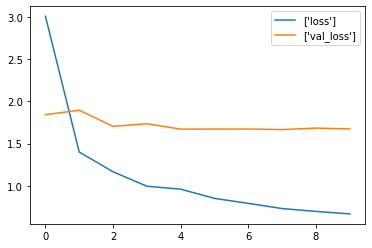

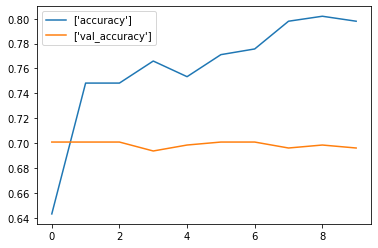

In [9]:
plt.plot(history.history["loss"], label=['loss'])
plt.plot(history.history["val_loss"], label=['val_loss'])
plt.legend()
plt.show()
plt.close()


plt.plot(history.history["accuracy"], label=['accuracy'])
plt.plot(history.history["val_accuracy"], label=['val_accuracy'])
plt.legend()
plt.show()
plt.close()

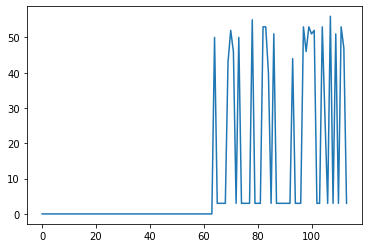

In [10]:
import random
import numpy as np
def generate(model, seed, temperature, generated_sequence_length):
    input_sequence = list(seed)
    # Generate the sequence by repeatedly predicting.
    generated_sequence = []
    while len(generated_sequence) < generated_sequence_length:
        prediction = model.predict(np.array([seed]))
        predicted_index = get_index_from_prediction(prediction[0], temperature)
        generated_sequence.append(predicted_index)
        input_sequence = input_sequence[1:]
        input_sequence.append(predicted_index)
    # Convert the generated sequence to a string.
    return [np.argmax(x) for x in seed] + list(generated_sequence)

def get_index_from_prediction(prediction, temperature=0.0):
    """ Gets an index from a prediction. """
    # Zero temperature - use the argmax.
    if temperature == 0.0:
        return np.argmax(prediction)
    # Non-zero temperature - do some random magic.
    else:
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / temperature
        exp_prediction= np.exp(prediction)
        prediction = exp_prediction / np.sum(exp_prediction)
        probabilities = np.random.multinomial(1, prediction, 1)
        return np.argmax(probabilities)
    
random_index = random.randint(0, len(x_train))
random_index = 0
seed = x_train[random_index]
generated_sequence = generate(model, seed=seed, temperature=1.0, generated_sequence_length=50)
plt.plot(generated_sequence)
plt.show()
plt.close()

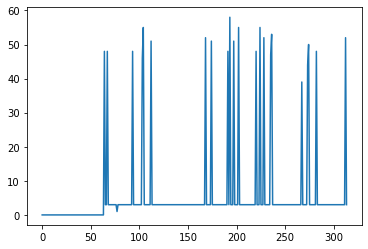

In [11]:
import random
import numpy as np

def generate(model, seed, temperature, generated_sequence_length):
    input_sequence = list(seed)
    # Generate the sequence by repeatedly predicting.
    generated_sequence = []
    while len(generated_sequence) < generated_sequence_length:
        prediction = model.predict(np.array([input_sequence]))
        predicted_index = get_index_from_prediction(prediction[0], temperature)
        generated_sequence.append(predicted_index)
        input_sequence = input_sequence[1:]
        input_sequence.append(prediction[0])
    # Convert the generated sequence to a string.
    return [np.argmax(x) for x in seed] + list(generated_sequence)

def get_index_from_prediction(prediction, temperature=0.0):
    """ Gets an index from a prediction. """
    # Zero temperature - use the argmax.
    if temperature == 0.0:
        return np.argmax(prediction)
    # Non-zero temperature - do some random magic.
    else:
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / temperature
        exp_prediction= np.exp(prediction)
        prediction = exp_prediction / np.sum(exp_prediction)
        probabilities = np.random.multinomial(1, prediction, 1)
        return np.argmax(probabilities)

    random_index = random.randint(0, len(x_train))
random_index = 0
seed = x_train[random_index]
generated_sequence = generate(model, seed=seed, temperature=1.0, generated_sequence_length=250)
plt.plot(generated_sequence)
plt.show()
plt.close()

In [12]:
!pip install note-seq

In [13]:
!brew install fluidsynth

==> Downloading https://homebrew.bintray.com/bottles/fluid-synth-2.1.4.catalina.
Already downloaded: /Users/iskriyanavasileva/Library/Caches/Homebrew/downloads/7dc976f407af26084df4b0591c73cbfc2be4c6eed52db6abe85a30ea91723f5e--fluid-synth-2.1.4.catalina.bottle.tar.gz
==> Pouring fluid-synth-2.1.4.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/fluid-synth/2.1.4: 33 files, 877.7KB


In [14]:
!pip install pyfluidsynth

In [15]:
import note_seq

def play(sequence):
    note_sequence = note_seq.protobuf.music_pb2.NoteSequence()
    note_sequence.tempos.add().qpm = 120.0
    note_sequence.ticks_per_quarter = note_seq.constants.STANDARD_PPQ
    note_sequence.total_time = 0.0
    
    time = 0.0
    sixteenth_length = 2.0 / 16.0
    pitch = None
    start_time = None
    for n in sequence:
        
        if n < 4 and pitch is None:
            continue
            
        elif n < 4 and pitch != None:
            note = note_seq.protobuf.music_pb2.NoteSequence.Note()
            note.pitch = pitch + 24
            note.velocity = 100
            note.start_time = start_time
            note.end_time = time
            note_sequence.notes.append(note)
            pitch = None
            start_time = None
        elif n >= 4 and pitch != None:
            note = note_seq.protobuf.music_pb2.NoteSequence.Note()
            note.pitch = pitch + 24
            note.velocity = 100
            note.start_time = start_time
            note.end_time = time
            note_sequence.notes.append(note)
            pitch = n
            start_time = time
            
        elif n >= 4 and pitch is None:
            pitch = n
            start_time = time
        else:
            assert False
        time += sixteenth_length
        
    note_seq.plot_sequence(note_sequence)
    note_seq.play_sequence(note_sequence, synth=note_seq.fluidsynth)
    
play(generated_sequence)

Loading BokehJS ...

AttributeError: module 'fluidsynth' has no attribute 'Synth'

In [ ]:
#!pip uninstall pyfluidsynth
#!pip install pyfluidsynth==1.2.5

In [16]:
#fluidsynth.__file__

NameError: name 'fluidsynth' is not defined